# 앙상블(Ensemble)

: <span style='background-color: #ffdce0'>**여러 개**</span>의 **분류기 생성** -> 그 <span style='background-color: #ffdce0'>**예측**</span>을 **결합** -> 보다 정확한 최종 예측 도출  
<br>
<span style="color: red">**"집단 지성"**</span>

## 유형

1. Voting - Hard Votinf, Soft Voting
2. Bagging - RandomForest
3. Boosting - AdaBoost, Gradient Boost, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)
4. Stacking 등

## Voting vs Bagging

두 방식 모두 **최종 예측 결과**를 **투표**를 통해 결정함

| Voting                                                              | Bagging                                                                    |
|---------------------------------------------------------------------|----------------------------------------------------------------------------|
|  전체 데이터 세트를 **서로 다른** 알고리즘을 가진 분류기로 학습을 수행함|서로 다른 샘플링된 데이터 세트를 **같은** 알고리즘을 가진 분류기로 학습을 수행함|

<p align="center"><img src="./bagging.png"></p>

**Bagging**은 <span style='background-color: #ffdce0'>**부트스트래핑(Bootstrapping)**</span> 분할 방식을 사용함  
          **: 원본 학습 데이터를 샘플링** -> **추출** -> **개별 분류기의 학습데이터로 할당**  
          

## 교차 검증 vs Bagging

교차 검증은 데이터 세트 간에 중첩을 허용하지 않음  
**배깅은 데이터 세트 간 <span style='background-color: #ffdce0'>중첩</span>을 허용**함

## Voting 유형

### Hard Voting

: 예측 결과값을 <span style="color: #2D3748; background-color:#fff5b1;">**다수결**</span>로 최종 보팅 결과값으로 결정 / default 값

### Soft Voting 

: 예측 결과값 간 **확률을 모두 더해 이를 평균**하여 <span style="color: #2D3748; background-color:#fff5b1;">**확률이 가장 높은 값**</span>을 최종 보팅 결과값으로 결정

<p align="center"><img src="./voting.png"></p>

=> 일반적으로 하드 보팅보다는 **소프트 보팅**이 **예측 성능이 좋아** 더 많이 사용됨

## Voting Classifier, 보팅 분류기

**주요 생성 인자 : estimators, voting**

> 위스콘신 유방암 데이터 세트를 예측 분석해보자

In [1]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
cancer = load_breast_cancer()

In [4]:
data_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
data_df[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
# 개별 모델은 로지스틱 회귀와 KNN 사용
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 8)

In [16]:
# 개별 모델은 소프트 보팅 기반 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

# estimators는 리스트 값으로 보팅에 사용될 여러 개의 분류기 객체들을 튜플 형식으로 입력받음

In [8]:
# 학습 및 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = .2, random_state = 156)

In [10]:
# votingclassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
accuracy_score(y_test, pred).round(4) # voting 분류기 정확도

0.9561

In [14]:
# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(f'{class_name} : {accuracy_score(y_test, pred).round(4)}')    

LogisticRegression : 0.9474
KNeighborsClassifier : 0.9386


In [15]:
# print('{0}: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

=> **보팅분류기**의 정확도가 조금 높게 나타남<br>
하지만, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음<br>
그럼에도 불구하고 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우 많음<br>
다양한 관점에서 문제에 접근하고 서로의 약점을 보완해서 높은 유연성을 가질 수 있기 때문임<br>
**배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반**으로 함<br>
즉, <span style='background-color: #ffdce0'>**결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 편향-분산 트레이드오프의 효과를 극대화**</span>할 수 있다는 말임!

------------

# 랜덤 포레스트

bagging의 대표적인 알고리즘

<p align="center"><img src="./randomforest.png"></p>

여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 **모든 분류기가 투표를 통해** 예측을 결정

<span style='background-color: #ffdce0'>**부트스트래핑(bootstrapping) 분할 방식**</span>임, **중첩 허용**

   : bootstrap aggregating의 줄임말

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [18]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0],  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [19]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [20]:
# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

In [21]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0, max_depth = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

np.round(accuracy, 4)

0.9196

## 하이퍼 파라미터 및 튜닝

> **n_estimators** : 나무를 몇 개 심을건지 / 기본값 : 10

> **max_features** : 최적의 분할을 위해 고려한 최대 피처 개수<br>
여기서 None은 전체 피처 개수가 아닌 <span style='background-color: #ffdce0'>**auto**</span>임 즉, <span style='background-color: #ffdce0'>**sqrt(루트)**</span>와 같음 주의

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth' : [8, 16, 24],
          'min_samples_leaf' : [1, 6, 12],
          'min_samples_split' : [2, 8, 16]
         }


# RandomForestClassifier 객체 생성
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)

# GridSearchCV 수행
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

<span style="color: #2D3748; background-color:#fff5b1;">RandomForestClassifier 객체와 GridSearchCV 생성 시 **n_jobs = -1** 파라미터를 추가하면 **모든 CPU 코어를 이용**한 학습이 가능함</span>

In [17]:
grid_cv.best_params_ # 최적 하이퍼 파라미터

{'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [18]:
np.round((grid_cv.best_score_), 4) # 최고 예측 정확도

0.9165

> 최적 하이퍼 파라미터로 다시 학습시킨 뒤 예측 성능을 측정해보자.

In [19]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 6, max_depth = 16, min_samples_split = 2, random_state = 0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
accuracy = accuracy_score(y_test, pred)

np.round(accuracy, 4)

0.926

## 피처 중요도 시각화

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

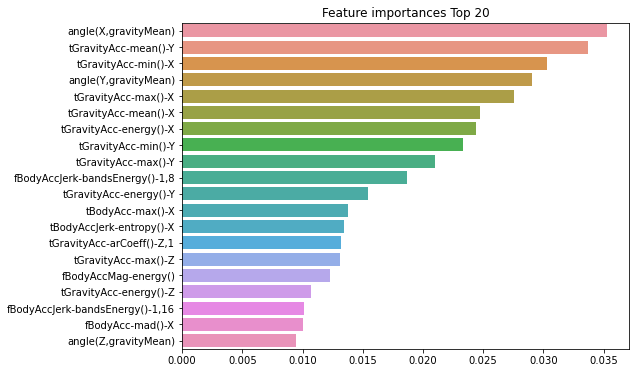

In [22]:
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

-----------------

# GBM(Gradient Boosting Machine)

부스팅 알고리즘은 **여러 개의 약한 학습기**(weak learner)를 <span style="color: #2D3748; background-color:#fff5b1;">**순차적**으로</span> 학습 및 예측하면서 <span style="color: #2D3748; background-color:#fff5b1;">**잘못 예측한 데이터**에 **가중치 부여**</span>를 통해 오류를 개선해 나가면서 학습하는 방식

<span style="color: red">**경사 하강법**</span>(Gradient Descent) : **오류식을 최소화**하는 방향성을 가지고, **반복적**으로 **가중치 값을 업데이트**

> GBM을 이용해 사용자 행동 데이터 세트를 예측 분류해보자.

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [5]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [17]:
# GBM 수행 시간 측정을 위해 시작 시간 설정
start_time = time.time()

In [18]:
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

In [19]:
gb_accuracy # GBM 정확도

0.9389209365456397

In [20]:
np.round(time.time() - start_time, 4) # GBM 수행 시간

482.572

=> 수행 시간 오래 걸림

## 하이퍼 파라미터

> **loss** : 경사 하강법에서 사용할 **비용** 함수 ( = error, 오차, 손실 함수, cost function, 비용 함수, objective function, 목적 함수)

> **learning_rate**[default = 0.1] : GBM이 학습을 진행할 때마다 적용하는 **학습률**, 오류 값을 보정해주는 계수, 0 ~ 1 사이의 값으로 지정

> n_estimatiors : 몇 개의 나무를 심을 것인가

> subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율

----------

# XGBM(eXtra Gradient Boost)

- GBM에 기반하고 있지만, GBM의 단점인 **느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결**해서 가장 각광받고 있는 알고리즘 중 하나임
- 병렬 CPU 환경에서 병렬 학습이 가능함  
 
------------------------------------------------------------------  
> 장점  
|                               |                                                                    |  
|-------------------------------|--------------------------------------------------------------------|
|뛰어난 예측 성능                |                                                                    |
|**GBM 대비 빠른 수행 시간**     |                                                                    |
|**과적합 규제(Regularization)** |                                                                    |
|**Tree pruning**(나무 가지치기) |더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄임         |
|자체 내장된 교차 검증           |평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 존재함 |
|결손값 자체 처리                |                                                                     |
--------------------------------|---------------------------------------------------------------------|

## 주요 부스터 파라미터

> **eta**[default = 0.3, alias = leaning_rate] : GBM의 학습률(learning_rate)과 같은 파라미터  
                            사이킷런 래퍼 클래스에서는 default = 0.1이며, 보통 0.01 ~ 0.2 사이의 값을 선호

> **num_boost_rounds** : GBM의 n_estimators와 같은 파라미터

> **min_child_weigh**[default = 1] : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합  
                       **값이 클수록 분할을 자제**함, 과적합을 조절하기 위해 사용됨

> **gamma**[default = 0, alias = min_split_loss] : **최소 손실 감소 값**  
                                 값이 클수록 과적합 감소 효과가 있음

> **max_depth**[default = 6] : 0을 지정하면 깊이에 제한이 없음

> **sub_sample**[default = 1] : 데이터를 샘플링하는 비율을 지정함, 보통 0.5 ~ 1 사이의 값을 지정

## 과적합 문제가 심각하다면?

> eta 값을 낮춤(0.01 ~ 0.1) 단, eta 값을 낮추 경우 num_round 또는 n_estimators 는 반대로 높여줘야 함

> max_depth 값을 낮춤

> min_child_weight 값을 높임

> gamma 값을 높임

In [24]:
!pip install xgboost

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier

In [26]:
print(xgb.__version__)

1.6.2


## 적용하기 - 위스콘신 유방암 예측

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

In [3]:
cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


악성인 'malignant'의 값은 0, 양성인 'benign' 값은 1임

In [4]:
dataset.target_names # 타깃 레이블 값의 종류

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer_df['target'].value_counts(ascending = True) # 레이블 값의 분포도 확인

0    212
1    357
Name: target, dtype: int64

> 학습 및 테스트용 데이터 세트 추출 후, 학습용 데이터에서 90%를 최종 학습용 10%를 검증용으로 분할해보자.  
(검증 성능 평가와 조기 중단을 수행해보기 위함)

In [7]:
X_features = cancer_df.iloc[:, :-1]
y_labels = cancer_df.iloc[:, -1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = .2, random_state = 156)

In [11]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [12]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .1, random_state = 156)

In [13]:
print(X_tr.shape, X_val.shape)

(409, 30) (46, 30)


In [15]:
# 학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data = X_tr, label = y_tr)
dval = xgb.DMatrix(data = X_val, label = y_val)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [16]:
params = { 'max_depth' : 3,
           'eta' : 0.05,
           'objective' : 'binary:logistic',
           'eval_metric' : 'logloss'
         }

num_rounds = 400

In [17]:
# 학습 데이터 셋은 train, 평가 데이터 셋은 eval로 명기함
eval_list = [(dtr, 'train'), (dval, 'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain = dtr, num_boost_round = num_rounds, 
                     early_stopping_rounds = 50, evals = eval_list )

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

In [18]:
pred_probs = xgb_model.predict(dtest)
np.round(pred_probs[:10], 3)

array([0.845, 0.008, 0.68 , 0.081, 0.975, 0.999, 0.998, 0.998, 0.996,
       0.001], dtype=float32)

In [26]:
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 list 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
preds[:10]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[34,  3],
       [ 2, 75]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print(accuracy_score(y_test, preds))
print(precision_score(y_test, preds))
print(recall_score(y_test, preds))
print(f1_score(y_test, preds))
roc_auc_score(y_test, preds)

0.956140350877193
0.9615384615384616
0.974025974025974
0.967741935483871


0.9464724464724464